# Exercise 2: Data Processing and Analysis

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
"""
try:
    from gofer.ok import check
except:
    %pip install git+https://github.com/grading/gradememaybe.git
    from gofer.ok import check

""" 

try: 
    import otter
    grader = otter.Notebook() ## setting up a grader for our specific notebook
except: 
    %pip install otter-grader
    import otter
    grader = otter.Notebook()

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [23]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [24]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [25]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

print(minimumHeartRate, maximumHeartRate)

40.0 296.5939695131042


In [26]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [27]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

len(outlierHeartRaterows) + len(nullHeartRaterows)

450

In [28]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

heartrateRows

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [29]:
HeartRateMean = float(heartrateRows['Heart Rate (BPM)'].mean())
print(HeartRateMean)


75.13268404820141


In [30]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


outlierHeartRaterows

/tmp/ipykernel_20679/2138589342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_20679/2138589342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622263019579,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185244686595328,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190062873693008,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628388578222,Highly Active,7
649,2008.0,75.132684,98.356789,2739.171166,7.272009723254014,Highly_Active,NaN
818,3156.0,75.132684,NaN,7281.778831,4.300171191258864,Sedentary,3
1195,3261.0,75.132684,99.652006,2867.872064,7.218530947169898,Active,7
1391,4621.0,75.132684,96.688083,20577.677290,8.049854248644627,Active,3
1602,4737.0,75.132684,95.095839,16072.283561,6.98847026102848,Actve,6


In [34]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = float(smartwatch_hr['Heart Rate (BPM)'].mean()) # Keeps original mean
print(fullTableHRMean)

75.13268404820141


In [35]:
grader.check('q2')

Question 2 results: All test cases passed!

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

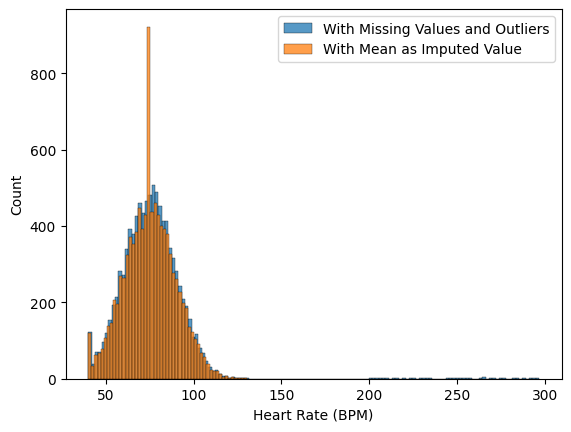

In [36]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 

There is a peak in the mean as imputed values, which is lower compared to the original and the median makes the BPM lower as well by around .1 compared to the original

In [37]:
## coding cell to check the difference in median values 

new_median = smartwatch_hr['Heart Rate (BPM)'].median()
originalHR = smartwatch['Heart Rate (BPM)'].median()

print(new_median, originalHR)


75.13268404820141 75.22060125775644


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [38]:
minBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].min())

maxBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].max())

meanBloodO2 = float(smartwatch['Blood Oxygen Level (%)'].mean())

minBloodO2, maxBloodO2, meanBloodO2

(90.79120814564097, 100.0, 97.84158102099076)

In [39]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

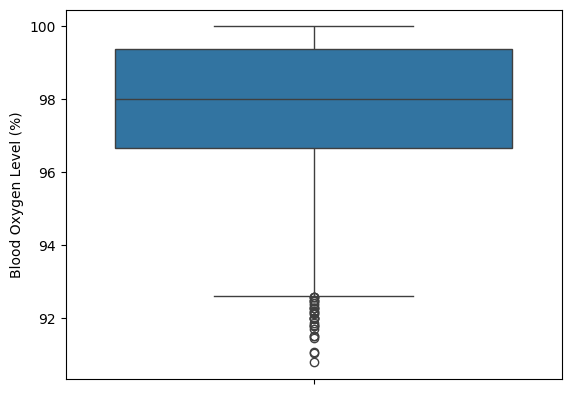

In [40]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 

I would deal with the missing and outlier values using the mean imputation method so we dont lose any of the outlier data. With mean the change is very small comapred to the original and losing less of the total number of values.

In [60]:
## use this space or additional cells to deal with the missing/outlier values. 

len(smartwatch_hr)


outlier_blood02 = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] < 92.5]
# len(outlier_blood02)



null_blood02 = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]
# len(null_blood02)

bo2_rows = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isnull()) & (smartwatch_hr['Blood Oxygen Level (%)'] >=  92.5)]
print(bo2_rows)

bo2_mean = bo2_rows['Blood Oxygen Level (%)'].mean()
print(bo2_mean)

outlier_blood02['Blood Oxygen Level (%)'] = float(bo2_mean)
null_blood02['Blood Oxygen Level (%)'] = float(bo2_mean)

smartwatch_o2 = pd.concat([outlier_blood02, null_blood02, bo2_rows])

smartwatch_o2

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
2                     ERROR  Highly Active            5  
337    

/tmp/ipykernel_20679/2545367906.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_blood02['Blood Oxygen Level (%)'] = float(bo2_mean)
/tmp/ipykernel_20679/2545367906.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_blood02['Blood Oxygen Level (%)'] = float(bo2_mean)


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
389,4991.0,89.812696,97.858090,3197.915998,6.867673807383509,NaN,7
548,1833.0,78.880652,97.858090,2274.291267,6.833725883961385,Sedentary,4
773,3914.0,74.337231,97.858090,2482.815316,7.45563119856827,Actve,5
859,2388.0,43.259383,97.858090,994.697587,4.913507114565334,Highly_Active,10
944,3703.0,84.058395,97.858090,9390.095074,4.550439370733248,Active,4
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [61]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

minSteps, maxSteps, meanSteps



(np.float64(0.9101380609604088),
 np.float64(62486.690753464914),
 np.float64(6985.685884992229))

In [62]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 
I am dropping null values only (only 100) and keeping step count outliers since it can provide aditional information. 

543
100


/tmp/ipykernel_20679/2808713090.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSteprows ['Step Count'] = meanSteps
/tmp/ipykernel_20679/2808713090.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSteprows ['Step Count'] = meanSteps


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
7079,2150.0,61.665881,97.858090,6985.685885,5.590848665164669,Active,7
8369,2283.0,75.132684,97.858090,6985.685885,5.291653956497481,Highly_Active,2
6577,4037.0,75.132684,97.858090,6985.685885,10.540683746991265,Sedentary,NaN
644,3744.0,52.578793,97.858090,6985.685885,4.497472763173107,Sedentary,7
1260,3072.0,95.873161,97.858090,6985.685885,6.175934332407844,Sedentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


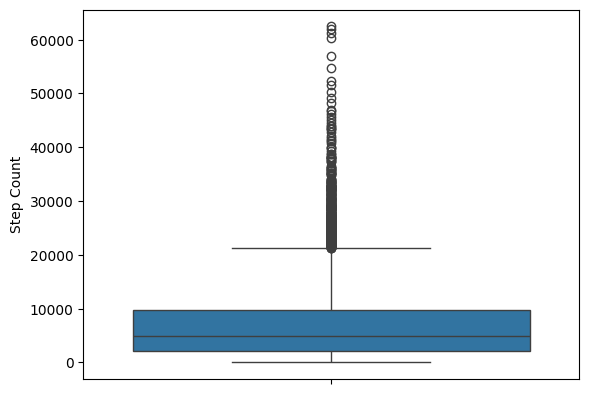

In [63]:
## use this space or additional cells to address the missing or outlier data. 
sns.boxplot(smartwatch_o2['Step Count'])

outlierSteprows = smartwatch_o2[smartwatch_o2['Step Count'] > 20000]
print(len(outlierSteprows))

nullSteprows = smartwatch_o2[smartwatch_o2['Step Count'].isnull()]
print(len(nullSteprows))



StepRows = smartwatch_o2[(~smartwatch_o2['Step Count'].isnull()) & (smartwatch_o2['Step Count'] <=  20000)]

outlierSteprows ['Step Count'] = meanSteps
nullSteprows ['Step Count'] = meanSteps

smartwatch_steps = pd.concat([outlierSteprows, nullSteprows, StepRows])

smartwatch_steps

Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [64]:
minSleep = smartwatch['Sleep Duration (hours)'].min()

minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [65]:
for item in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(item)  ## first try to see if it can be converted to a number
    except:
        print(item)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [66]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2471,1337.0,62.696824,96.830559,6985.685885,ERROR,Highly_Active,10
2989,3636.0,67.155900,97.957427,6985.685885,ERROR,Actve,3
4651,3070.0,93.153315,97.629232,6985.685885,ERROR,Highly Active,4
4732,3172.0,44.564677,93.509192,6985.685885,ERROR,Seddentary,3
4981,1187.0,80.978300,94.933598,6985.685885,ERROR,Sedentary,3
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,ERROR,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [67]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_20679/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2471,1337.0,62.696824,96.830559,6985.685885,NaN,Highly_Active,10
2989,3636.0,67.155900,97.957427,6985.685885,NaN,Actve,3
4651,3070.0,93.153315,97.629232,6985.685885,NaN,Highly Active,4
4732,3172.0,44.564677,93.509192,6985.685885,NaN,Seddentary,3
4981,1187.0,80.978300,94.933598,6985.685885,NaN,Sedentary,3
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,NaN,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [68]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
7079,2150.0,61.665881,97.858090,6985.685885,5.590849,Active,7
8369,2283.0,75.132684,97.858090,6985.685885,5.291654,Highly_Active,2
6577,4037.0,75.132684,97.858090,6985.685885,10.540684,Sedentary,NaN
644,3744.0,52.578793,97.858090,6985.685885,4.497473,Sedentary,7
1260,3072.0,95.873161,97.858090,6985.685885,6.175934,Sedentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [69]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()
maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()
meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(-0.1944527906201543),
 np.float64(12.140232872862926),
 np.float64(6.505462918406444))

In [70]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 

Mean sleep hours makes a small change to the mean and losing no data with mean sleep imputation

13
397


/tmp/ipykernel_20679/548433039.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSleeprows ['Sleep Duration (hours)'] = meanSleep
/tmp/ipykernel_20679/548433039.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleeprows ['Sleep Duration (hours)'] = meanSleep


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
252,1709.0,77.099211,97.858090,3465.970911,6.505463,Highly Active,9
2133,4401.0,91.964082,97.171460,652.741730,6.505463,Actve,1
2492,3936.0,73.018575,100.000000,3546.105365,6.505463,Actve,3
2634,2712.0,53.079149,94.937905,1955.915367,6.505463,Active,2
2910,3009.0,93.576744,97.150920,3377.584984,6.505463,Active,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


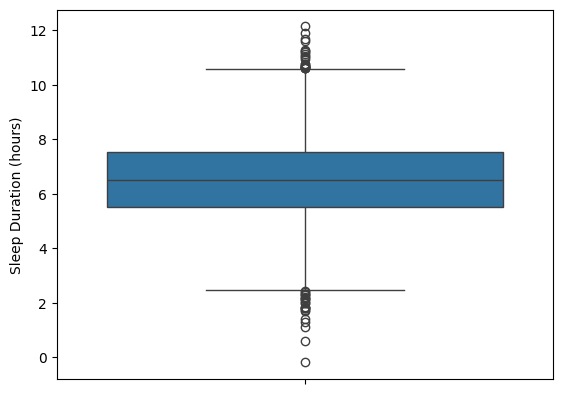

In [71]:
## use this space or additional cells to address the missing or outlier data. 
sns.boxplot(smartwatch_sleep['Sleep Duration (hours)'])

outlierSleeprows = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] < 2]
print(len(outlierSleeprows))

nullSleeprows = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]
print(len(nullSleeprows))


SleepRows = smartwatch_sleep[(~smartwatch_sleep['Sleep Duration (hours)'].isnull()) & (smartwatch_sleep['Sleep Duration (hours)'] >=  2)]

outlierSleeprows ['Sleep Duration (hours)'] = meanSleep
nullSleeprows ['Sleep Duration (hours)'] = meanSleep

smartwatch_updated_sleep = pd.concat([outlierSleeprows, nullSleeprows, SleepRows])

smartwatch_updated_sleep

We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [72]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

Very High
nan


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
I will assign the very high and NaN values with none

In [73]:
## cell to deal with 'Very High' value
smartwatch_updated_sleep.loc[smartwatch_updated_sleep['Stress Level'] == 'Very High', 'Stress Level'] = None
smartwatch_updated_sleep['Stress Level'] = pd.to_numeric(smartwatch_updated_sleep['Stress Level'], errors='coerce')

smartwatch_stress = smartwatch_updated_sleep
smartwatch_stress



,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
252,1709.0,77.099211,97.858090,3465.970911,6.505463,Highly Active,9.0
2133,4401.0,91.964082,97.171460,652.741730,6.505463,Actve,1.0
2492,3936.0,73.018575,100.000000,3546.105365,6.505463,Actve,3.0
2634,2712.0,53.079149,94.937905,1955.915367,6.505463,Active,2.0
2910,3009.0,93.576744,97.150920,3377.584984,6.505463,Active,2.0
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10.0
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7.0
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2.0
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4.0


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [74]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [75]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Active') | (smartwatch_stress['Activity Level'] == 'Actve')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Sedentary') | (smartwatch_stress['Activity Level'] == 'Seddentary')]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_20679/86596773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_20679/86596773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_20679/86596773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
252,1709.0,77.099211,97.858090,3465.970911,6.505463,Highly Active,9.0,1.0
3264,4078.0,79.568061,99.268270,4000.982032,6.505463,Highly Active,2.0,1.0
4022,1343.0,86.880968,99.925376,5928.993113,6.505463,Highly Active,7.0,1.0
5818,2293.0,80.840205,98.691372,5033.180668,6.505463,Highly Active,9.0,1.0
6764,2874.0,78.224591,97.232685,3171.379061,6.505463,Highly Active,5.0,1.0
...,...,...,...,...,...,...,...,...
9842,2108.0,71.152455,98.585987,1480.777008,8.379498,NaN,9.0,NaN
9845,4203.0,91.417098,95.383875,1238.788704,6.226965,NaN,7.0,NaN
9867,2674.0,69.075313,99.067026,2759.328767,4.919706,NaN,5.0,NaN
9898,1409.0,79.941705,98.716816,619.353083,8.143443,NaN,8.0,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [76]:
final_table.isnull().sum()

User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            200
Stress Level              249
NumActivity               200
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [77]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 252 to 9991
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  10000 non-null  float64
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9751 non-null   float64
 7   NumActivity             9800 non-null   float64
dtypes: float64(7), object(1)
memory usage: 703.1+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

The data points appear widely spread, with a dense concentration in the middle (around 80 BPM and 5,000-7,500 steps) which makes sense based o the mean values we imputed. The spread suggests no strong correlation, as points are widely distributed rather than forming a clear trend. 

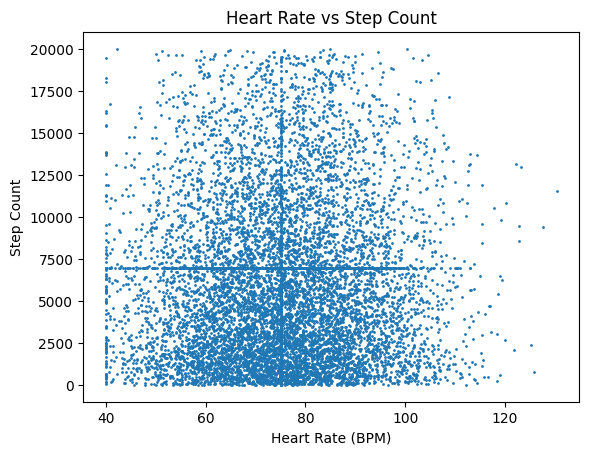

In [80]:
x = final_table['Heart Rate (BPM)']
y = final_table['Step Count']

plt.scatter(x, y, s=1)
plt.ylabel('Step Count')
plt.xlabel('Heart Rate (BPM)')
plt.title('Heart Rate vs Step Count')
plt.show()

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:

The new scatter plot shows a wider spread in step count, reaching up to 60,000 steps, unlike the previous one, which peaked at 20,000. There are more extreme outliers, suggesting that missing values may have affected the data. The lower step count region remains dense, but overall, no clear trend between heart rate and step count is visible. The inclusion of NaN values may have introduced inconsistencies.

In [82]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

6985.685884992229
75.13268404820141


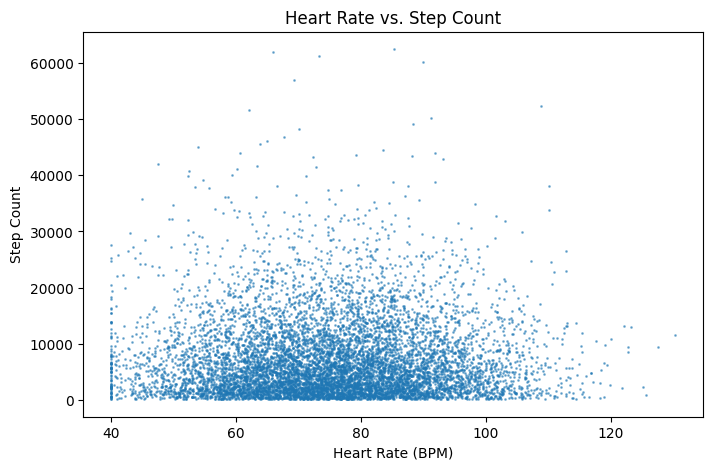

In [87]:
#plt.scatter(..., ..., s = ...)
print(meanSteps)
print(HeartRateMean)
# Selecting Heart Rate (BPM) and Stress Level for visualization
x = nanTable['Heart Rate (BPM)']
y = nanTable['Step Count']

# Creating the scatter plot with different sizes
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=1, alpha=0.5)  # Change 's' to 10, 1, 0.5, and 0.1 to observe differences
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Step Count')
plt.title('Heart Rate vs. Step Count')
plt.show()


**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

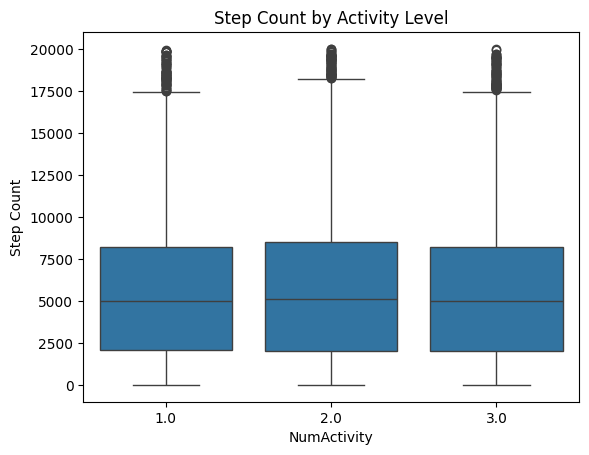

In [84]:
## Visualization 

sns.boxplot(x='NumActivity', y='Step Count', data=final_table)
plt.title('Step Count by Activity Level')
plt.show()



In [85]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['NumActivity'] == 1] ## sedentary rows
act = final_table[final_table['NumActivity'] == 2] ## active rows
hact = final_table[final_table['NumActivity'] == 3] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.754, p-value: 0.470


Is there significant difference between the groups' step counts?  

ANSWER:

The ANOVA test shows no significant difference in step counts between activity levels (p = 0.470), meaning the groups do not statistically differ. The boxplot confirms similar distributions across categories, with overlapping medians and similar spread.

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

When sharing these findings with a broader audience, it’s important to be clear and honest about what the data shows. The results suggest that step count does not significantly change across different activity levels (p = 0.470). However, step count alone is not the best way to measure physical activity or health. Other factors, like exercise intensity, workout duration, and activities that don’t involve steps, also matter.The dataset had missing values, which were filled using mean imputation. This method replaces missing data with the average value, which can help keep the dataset complete but may also hide important variations. Because of this, the results should be interpreted with caution.
To avoid misleading conclusions, I would explain that this data does not show a cause-and-effect relationship. I would also mention possible issues with data accuracy, such as errors in step tracking or differences in how people use activity trackers. When presenting to policymakers or healthcare providers, I would encourage them to consider multiple health measures, not just step count. I would use simple language and clear visuals to make sure the information is easy to understand and not misinterpreted.